# CNN
Import libraries 

In [42]:
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D

# load data 

In [43]:
(x_train , y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [44]:
x_train.shape

(50000, 32, 32, 3)

In [45]:
x_test.shape

(10000, 32, 32, 3)

In [46]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### reshape

In [47]:
y_train = y_train.reshape(-1,)
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [48]:
y_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Observe data

In [49]:
def showImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

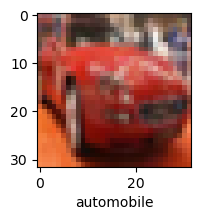

In [50]:
showImage(x_train,y_train,5)

In [51]:
x_train = x_train/255
x_test = x_test/255

In [52]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Build Model

In [53]:
model = Sequential()

model.add(Conv2D(filters = 32 ,kernel_size=(3,3),activation= "relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(filters = 64 ,kernel_size=(4,4),activation= "relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(units= 34 ,activation= "relu"))
model.add(Dense(units= 10 ,activation= "softmax"))



### Compile 


In [54]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

### Train

In [55]:
model.fit(x_train,y_train, validation_data=(x_test,y_test) , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5888 - accuracy: 0.4205 - val_loss: 1.3107 - val_accuracy: 0.5379
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2315 - accuracy: 0.5638 - val_loss: 1.1550 - val_accuracy: 0.5907
Epoch 3/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.0823 - accuracy: 0.6199 - val_loss: 1.0483 - val_accuracy: 0.6263
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9903 - accuracy: 0.6538 - val_loss: 1.0000 - val_accuracy: 0.6477
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9281 - accuracy: 0.6764 - val_loss: 0.9683 - val_accuracy: 0.6614
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8774 - accuracy: 0.6953 - val_loss: 0.9350 - val_accuracy: 0.6721
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8399 - accuracy: 0.7077 - val_loss: 0.9326 -

 ### Predictions 

In [56]:
y_predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [57]:
y_predictions[9]

array([1.1252774e-02, 9.4323736e-01, 7.0577196e-05, 7.5664786e-05,
       6.8509765e-04, 1.0701665e-05, 9.3289622e-04, 4.3249336e-05,
       1.9733493e-04, 4.3494269e-02], dtype=float32)

In [58]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [59]:
y_predictions

[3,
 1,
 1,
 8,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 3,
 7,
 9,
 6,
 5,
 4,
 8,
 6,
 4,
 2,
 4,
 9,
 4,
 6,
 4,
 2,
 9,
 6,
 6,
 5,
 2,
 3,
 9,
 2,
 4,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 5,
 3,
 7,
 4,
 9,
 8,
 2,
 3,
 8,
 8,
 7,
 3,
 5,
 3,
 7,
 5,
 2,
 0,
 6,
 2,
 1,
 0,
 5,
 1,
 4,
 3,
 8,
 8,
 0,
 2,
 7,
 8,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 0,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 2,
 0,
 3,
 4,
 6,
 6,
 6,
 1,
 1,
 5,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 7,
 0,
 4,
 3,
 5,
 8,
 7,
 1,
 2,
 8,
 9,
 8,
 3,
 3,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 4,
 6,
 5,
 7,
 2,
 0,
 9,
 6,
 0,
 0,
 3,
 2,
 9,
 3,
 4,
 0,
 1,
 6,
 6,
 2,
 7,
 8,
 6,
 9,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 7,
 2,
 6,
 4,
 8,
 6,
 3,
 3,
 0,
 6,
 8,
 4,
 1,
 7,
 4,
 8,
 8,
 7,
 8,
 3,
 0,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 6,
 7,
 5,
 7,
 8,
 0,
 4,
 9,
 8,
 7,
 7,
 3,
 9,
 7,
 4,
 9,
 3,
 4,
 3,
 6,
 3,
 1,
 3,
 8,
 8,
 0,
 4,
 0,
 3,
 5,
 1,
 9,
 2,
 9,
 0,
 2,
 0,
 8,
 2,
 0,


In [62]:
y_test = y_test.reshape(-1,)

In [63]:
y_predictions[0]

3

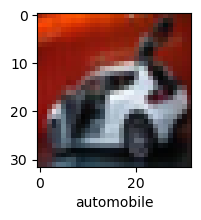

In [64]:
showImage(x_test,y_test,6)

### Evalutation 

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.80      0.88      0.84      1000
           2       0.59      0.59      0.59      1000
           3       0.53      0.42      0.47      1000
           4       0.60      0.68      0.64      1000
           5       0.67      0.51      0.58      1000
           6       0.65      0.85      0.74      1000
           7       0.75      0.74      0.75      1000
           8       0.88      0.78      0.82      1000
           9       0.81      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

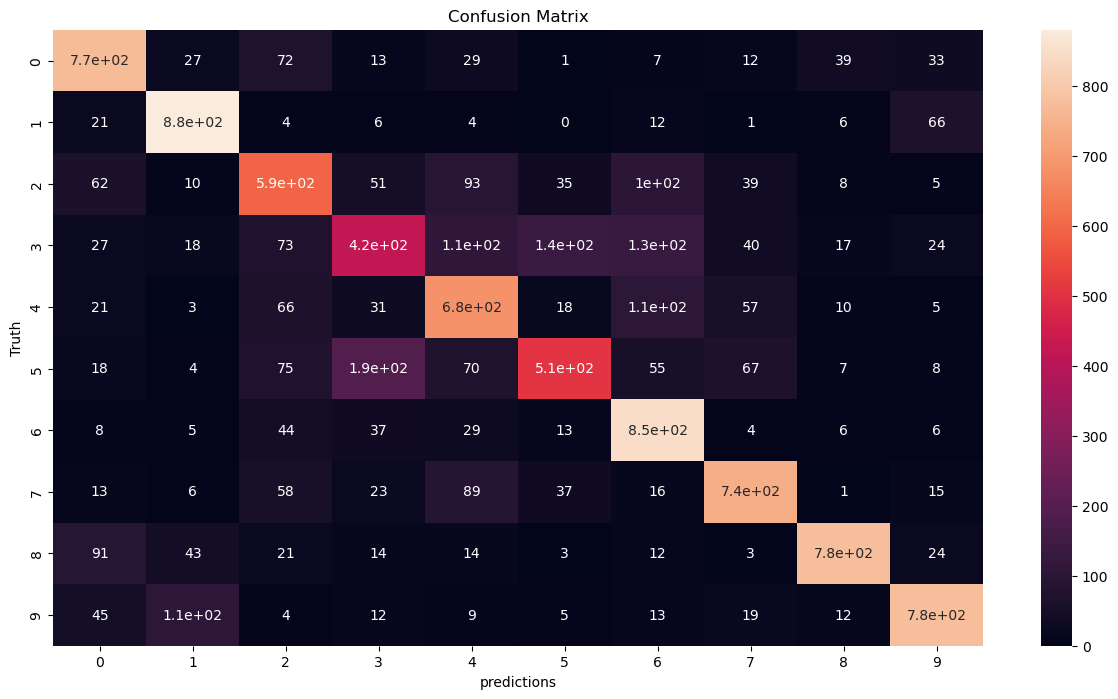

In [74]:
cm = confusion_matrix(y_test,y_predictions)
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot = True)
plt.ylabel("Truth")
plt.xlabel("predictions")
plt.title("Confusion Matrix")
plt.show()

